I was browsing Kaggle the other day and came across this dataset: a dataset that is scraped from a website that contains Gulzar's *Pukhraj*, and Rahat Indauri's *Dhoop Bahut Hai* and *Naaraz*. So I thought, why not make an AI that produces and mimics the beautiful Hindustani poetry that the two poets have to author. In Hindi/Urdu, short poems are often referred to as *shayaris* (correct me if I am wrong) and so, since I am very creative, I gave this project the name ShayarAI. You're welcome.

In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))
from fastai import *
from fastai.text import *
import os

/kaggle/input/nirmala/Nirmala.ttf
/kaggle/input/hindi-stopwords/Hindi_STOPWORDS.txt
/kaggle/input/hindi-poetry-dataset/sample_dhoopbahuthai_25.txt
/kaggle/input/hindi-poetry-dataset/sample_dhoopbahuthai_11.txt
/kaggle/input/hindi-poetry-dataset/sample_naaraz_4.txt
/kaggle/input/hindi-poetry-dataset/sample_naaraz_58.txt
/kaggle/input/hindi-poetry-dataset/sample_pukhraaj_11.txt
/kaggle/input/hindi-poetry-dataset/sample_pukhraaj_21.txt
/kaggle/input/hindi-poetry-dataset/sample_pukhraaj_9.txt
/kaggle/input/hindi-poetry-dataset/sample_naaraz_39.txt
/kaggle/input/hindi-poetry-dataset/sample_pukhraaj_8.txt
/kaggle/input/hindi-poetry-dataset/sample_dhoopbahuthai_68.txt
/kaggle/input/hindi-poetry-dataset/sample_naaraz_8.txt
/kaggle/input/hindi-poetry-dataset/sample_dhoopbahuthai_26.txt
/kaggle/input/hindi-poetry-dataset/sample_naaraz_44.txt
/kaggle/input/hindi-poetry-dataset/sample_pukhraaj_14.txt
/kaggle/input/hindi-poetry-dataset/sample_pukhraaj_20.txt
/kaggle/input/hindi-poetry-dataset/sampl

Let's take a look at what we are getting into. The following is a sample from *Naraz*.

In [2]:

path = '/kaggle/input/hindi-poetry-dataset'; path = Path(path)
file = 'sample_naaraz_22.txt'; file = Path(file)
filename = path/file
f = open(filename, 'r')
text = f.read()
print(text)

Naaraz Rahat Indori
नाराज़ राहत इन्दौरी
 हर मुसाफ़िर है सहारे तेरे
हर मुसाफ़िर है सहारे तेरे
कश्तियां तेरी, किनारे तेरे
तेरे दामन को ख़बर दे कोई,
टूटते रहते हैं तारे तेरे
धूप दरिया में रवानी थी बहुत
बह थक गए चांद सितारे तेरे
तेरे दरवाज़े को जुम्बिश न हुई
मैंने सब नाम पुकारे तेरे
बे तलब आँखों में क्या-क्या कुछ है
वो समझता है इशारे तेरे
कब पसीजेंगे ये बहरे बादल
हैं शज़र हाथ पसारे तेरे
मेरा इक पल भी मुझे मिल न सका
मैंने दिन-रात गुज़ारे तेरे
तेरी आँखें तेरी बीनाई है
तेरे मंज़र हैं नज़ारे  तेरे 
यह मेरी प्यास बता सकती है
क्यों समंदर हुए खारे तेरे
जो भी मनसूब तेरे नाम से थे
मैंने सब क़र्ज़ उतारे तेरे
तूने लिखा मेरे चेहरे पे धुंआ
मैंने आईने संवारे तेरे
और मेरा दिल वही मुफ़लिस का चिराग़
चाँद तेरा है सितारे तेरे
 जितने अपने थे, सब पराए थे
जितने अपने थे, सब पराए थे
हम हवा को गले लगाए थे
जितनी क़समें थीं, सब थीं शर्मिंदा,
जितने वादे थे सर झुकाए थे
जितने आंसू थे सब थे बेगाने
जितने मेहमां थे बिन बुलाए थे
सब क़िताबें पढ़ी-पढ़ाई थीं,
सारे क़िस्से सुने-सुनाए थे
एक बंजर ज़मीं के सीने में
मैंने कुछ आसमां उगाए थे
वरना

I then create a datastructure (pandas dataframe) to store all this text in a systematic and meticulous way.

In [3]:
poems = ''
for file in os.listdir(path):
    filename = path/file
    print(filename)
    f = open(filename, 'r')
    text = f.read()
    poems += text

/kaggle/input/hindi-poetry-dataset/sample_dhoopbahuthai_25.txt
/kaggle/input/hindi-poetry-dataset/sample_dhoopbahuthai_11.txt
/kaggle/input/hindi-poetry-dataset/sample_naaraz_4.txt
/kaggle/input/hindi-poetry-dataset/sample_naaraz_58.txt
/kaggle/input/hindi-poetry-dataset/sample_pukhraaj_11.txt
/kaggle/input/hindi-poetry-dataset/sample_pukhraaj_21.txt
/kaggle/input/hindi-poetry-dataset/sample_pukhraaj_9.txt
/kaggle/input/hindi-poetry-dataset/sample_naaraz_39.txt
/kaggle/input/hindi-poetry-dataset/sample_pukhraaj_8.txt
/kaggle/input/hindi-poetry-dataset/sample_dhoopbahuthai_68.txt
/kaggle/input/hindi-poetry-dataset/sample_naaraz_8.txt
/kaggle/input/hindi-poetry-dataset/sample_dhoopbahuthai_26.txt
/kaggle/input/hindi-poetry-dataset/sample_naaraz_44.txt
/kaggle/input/hindi-poetry-dataset/sample_pukhraaj_14.txt
/kaggle/input/hindi-poetry-dataset/sample_pukhraaj_20.txt
/kaggle/input/hindi-poetry-dataset/sample_naaraz_53.txt
/kaggle/input/hindi-poetry-dataset/sample_pukhraaj_1.txt
/kaggle/inp

In [4]:
print(poems[:100])

Dhoop Bahut Hai Rahat Indori
धूप बहुत है राहत इन्दौरी
 धूप बहुत है मौसम जल थल भेजो ना
धूप बहुत है मौ


In [5]:
# poems = poems.split()

In [6]:
# print(poems[:100])

In [7]:
import matplotlib as mtp

mtp.rcParams['figure.dpi'] = 640

In [8]:
with open("/kaggle/input/hindi-stopwords/Hindi_STOPWORDS.txt",encoding='utf-8') as f:
    stopword= f.read().strip('\ufeff')
stopword = stopword.split(", ")
stopword = [i.strip("'") for i in stopword]
print(stopword)
stopwords = set(stopword)

['अर्थात', 'कुछ', 'तेरी', 'साबुत', 'अपनि', 'हूं', 'काफि', 'यिह', 'जा', 'दे', 'देकर', 'रह', 'कह', 'कहा', "बात' ", 'जिन्हों', 'किर', 'कोई', 'हे', 'कोन', 'रहा', 'सब', 'सो', 'तक', 'इंहें', 'इसकि', 'अपनी', 'दबारा', 'सभि', 'होते', 'भीतर', 'निचे', 'घर', 'उन्हें', 'उन्ह', 'मेरे', 'था', 'व', 'इसमें', 'उसी', 'बिलकुल', 'होति', 'गया', 'सकता', 'अपना', 'लिये', 'उसका', 'पर', 'दवारा', 'गए', 'है', 'कितना', 'भि', 'लिए', 'वुह ', 'ना', 'किसि', 'परन्तु', 'किन्हें', 'बहुत', 'भी', 'तुम्हारे', 'निहायत', 'उन्हीं', 'वहिं', 'हैं', 'उन्हों', "इतयादि' ,'यहाँ", 'तब', 'पूरा', 'क्योंकि', 'कौनसा', 'आप', 'हुअ', 'ऐसे', 'एस', 'कारण', 'अप', 'पहले', 'तुम', 'जेसा', 'तिस', 'लेकिन', 'कहते', 'मगर', 'करता', 'संग', 'सभी', 'जीधर', 'किंहों', 'हि', 'द्वारा', 'हुआ', 'तू', 'जिंहें', 'उसने', 'पास', 'वहां', 'वह', 'किंहें', 'इंहों', 'मुझ', 'कुल', 'तिंहों', 'का', 'मेरी', 'तेरे', 'उनके', 'क्या', 'जहाँ', 'काफ़ी', 'वर्ग', 'वरग', 'बही', 'ये', 'जिस', 'इसि', 'हुई', 'साम्हने', 'नहिं', 'जैसे', 'वहीं', 'दिया', 'अभी', 'यहि', 'वग़ैरह', 'उनकि', 'न', '

In [9]:
import re
def preprocess_tokenize(text):
      # for removing punctuation from sentencesc
    text = str(text)
    text = re.sub(r'(\d+)', r'', text)
    
    text = text.replace('\n', '')
    text = text.replace('\r', '')
    text = text.replace('\t', '')
    text = text.replace('\u200d', '')
    text=re.sub("(__+)", ' ', str(text)).lower()   #remove _ if it occors more than one time consecutively
    text=re.sub("(--+)", ' ', str(text)).lower()   #remove - if it occors more than one time consecutively
    text=re.sub("(~~+)", ' ', str(text)).lower()   #remove ~ if it occors more than one time consecutively
    text=re.sub("(\+\++)", ' ', str(text)).lower()   #remove + if it occors more than one time consecutively
    text=re.sub("(\.\.+)", ' ', str(text)).lower()   #remove . if it occors more than one time consecutively
        
    text=re.sub(r"[<>()|&©@#ø\[\]\'\",;:?.~*!]", ' ', str(text)).lower() #remove <>()|&©ø"',;?~*!
    text = re.sub("([a-zA-Z])",' ',str(text)).lower()
    text = re.sub("(\s+)",' ',str(text)).lower()
    #text = text.split(' ')
    #text = [x for x in text if(x!='')]
    #text.insert(0,'<sos>')
    #text.insert(len(text),'<eos>')
    return text

In [10]:
import pandas as pd
import torch
import random
import numpy as np

In [11]:
text = preprocess_tokenize(poems) #poems

In [12]:
print(text[:5000])

 धूप बहुत है राहत इन्दौरी धूप बहुत है मौसम जल थल भेजो नाधूप बहुत है मौसम जल थल भेजो नबाबा मेरे नाम का बादल भेजो नमौल्सरी की शाख़ों पर भी दिए जलेंशाख़ों का केसरिया आँचल भेजो ननन्ही-मुन्नी सब चहकारें कहाँ गईंमोरों के पैरों की पायल भेजो नबस्ती-बस्ती दहशत किसने बो दी हैगलियों-बाज़ारों की हलचल भेजो नसारे मौसम एक उमस के आदी हैंछाँव की ख़ुशबू धूप का संदल भेजो नमैं बस्ती में आख़िर किस से बात करूँमेरे जैसा कोई पागल भेजो न सिर्फ़ सच और झूठ की मीज़ान में रक्खे रहेसिर्फ़ सच और झूठ की मीज़ान में रक्खे रहे हम बहादुर थे मगर मैदान में रक्खे रहे जुगनुओं ने फिर अँधेरों से लड़ाई जीत ली चाँद-सूरज घर के रौशनदान में रक्खे रहे धीरे-धीरे सारी किरनें ख़ुदकुशी करने लगीं हम सहीफ़ा थे मगर जुज़दान में रक्खे रहे बंद कमरे खोल कर सच्चाइयाँ रहने लगीं ख़्वाब कच्ची धूप थे दालान में रक्खे रहे सिर्फ़ इतना फ़ासला है ज़िंदगी से मौत का शाख़ से तोड़े गए गुलदान में रक्खे रहे ज़िंदगी भर अपनी गूँगी धड़कनों के साथ-साथ हम भी घर के क़ीमती सामान में रक्खे रहे सर पर सात आकाश ज़मीं पर सात समुंदर बिखरे हैंसर पर सात आकाश ज़मीं पर सात समु

In [13]:
from string import punctuation
from nltk.probability import FreqDist
from nltk.tokenize import word_tokenize

stopwords = set(stopword)

tokens = word_tokenize(text)
customStopWords = set(list(stopwords) + list(punctuation+'।'+'॥'))
wordsWOstopwords = [word for word in tokens if word not in customStopWords]
#removing numeric digits from list of words
wordsWOstopwords = [i for i in wordsWOstopwords if not i.isdigit()]
# freq = FreqDist(wordsWOstopwords)

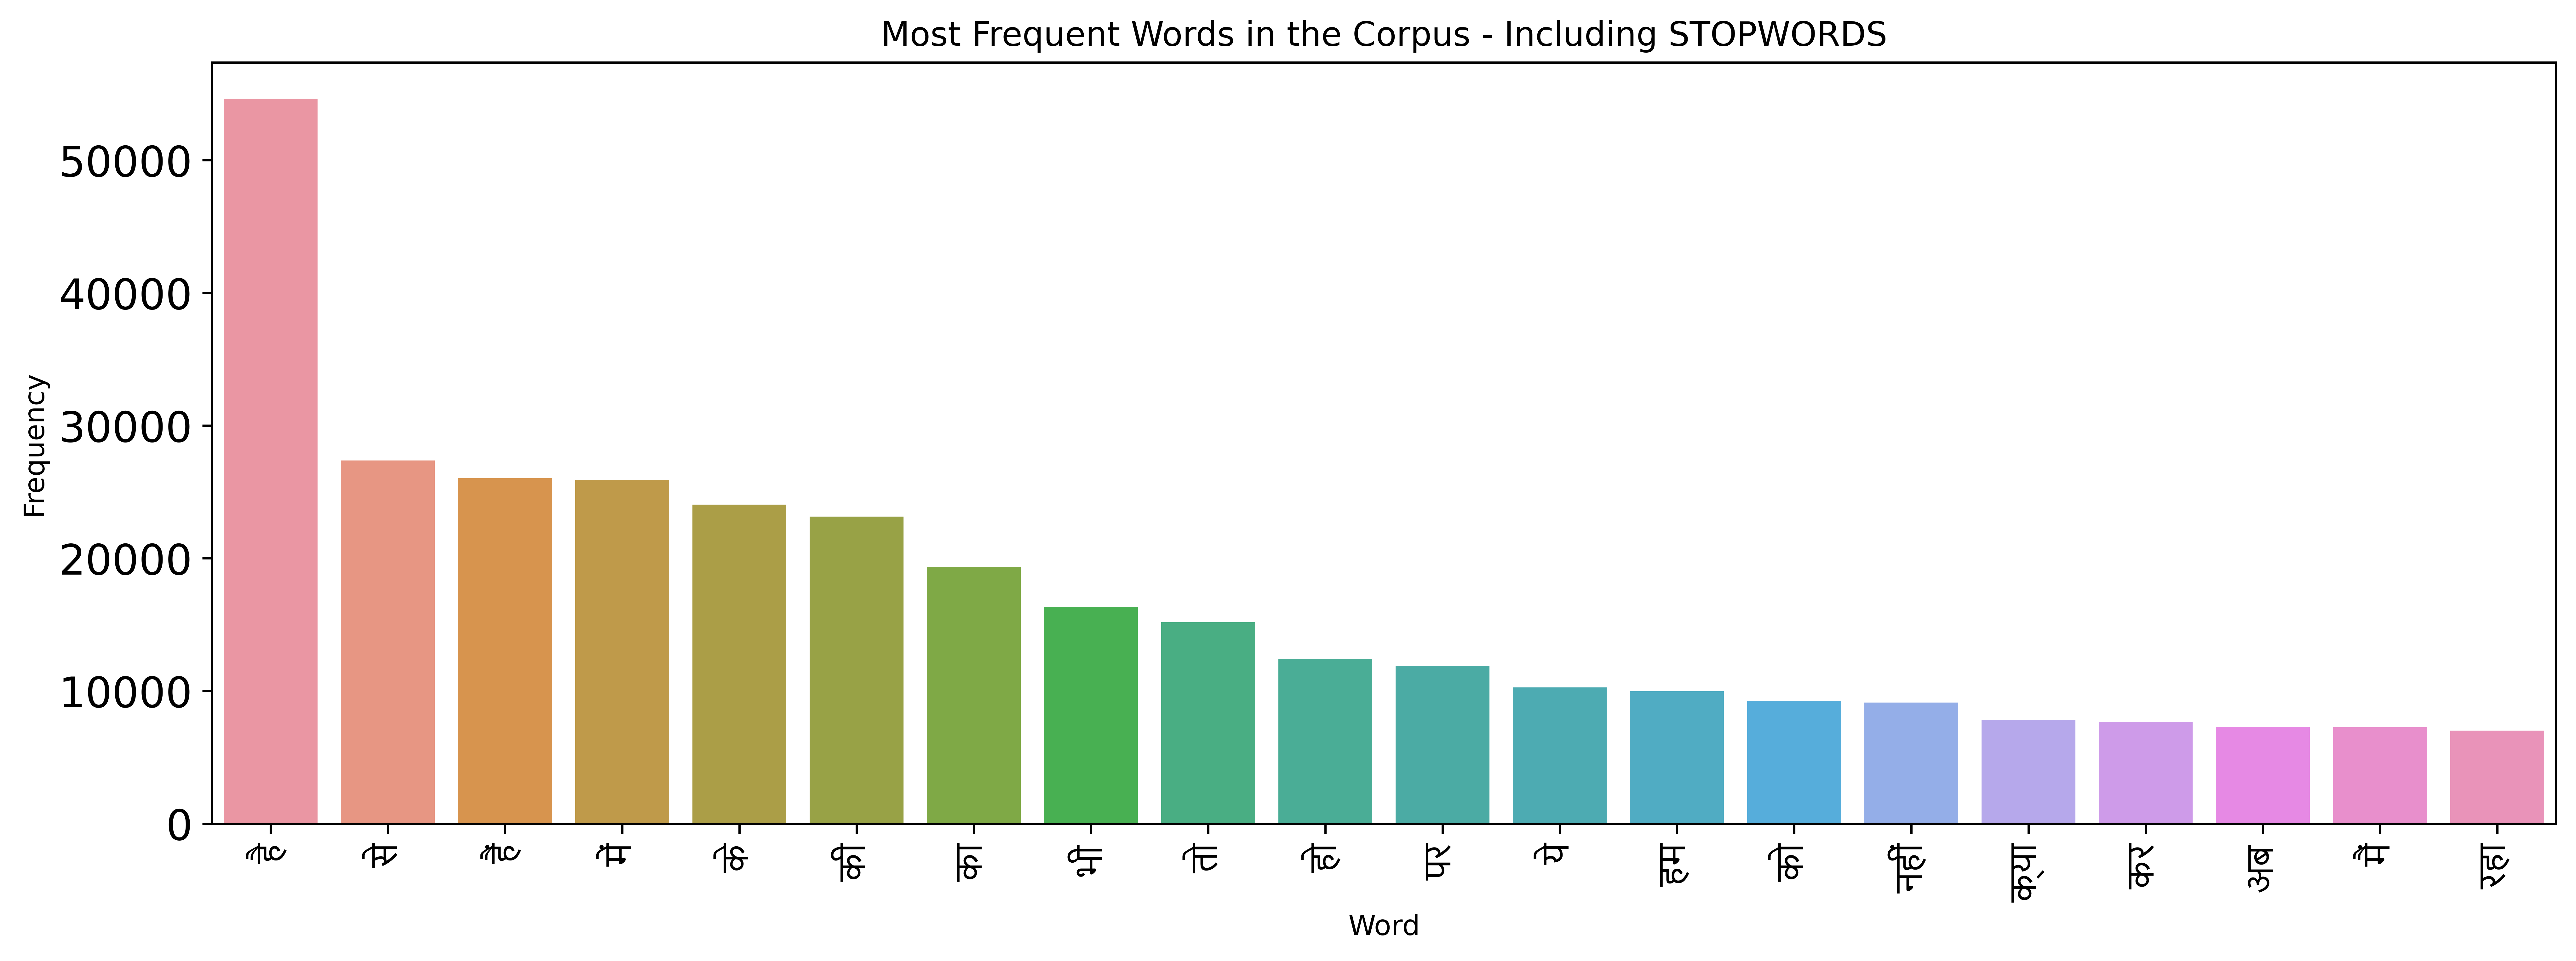

In [14]:
from matplotlib.font_manager import FontProperties
import seaborn as sns

hindi_font = FontProperties(fname = "../input/nirmala/Nirmala.ttf")

title = "Most Frequent Words in the Corpus - Including STOPWORDS"
# plot_word_frequency(corpus, title, 20)
word_freq = FreqDist(tokens)
labels = [element[0] for element in word_freq.most_common(20)]
counts = [element[1] for element in word_freq.most_common(20)]
plt.figure(figsize=(15,5), dpi=640)
plt.xticks(color="black", fontproperties=hindi_font, rotation=90, fontsize = 12)
plt.yticks(fontsize = 15)
plt.title(title)
plt.ylabel("Frequency")
plt.xlabel("Word")
plot = sns.barplot(labels,counts)

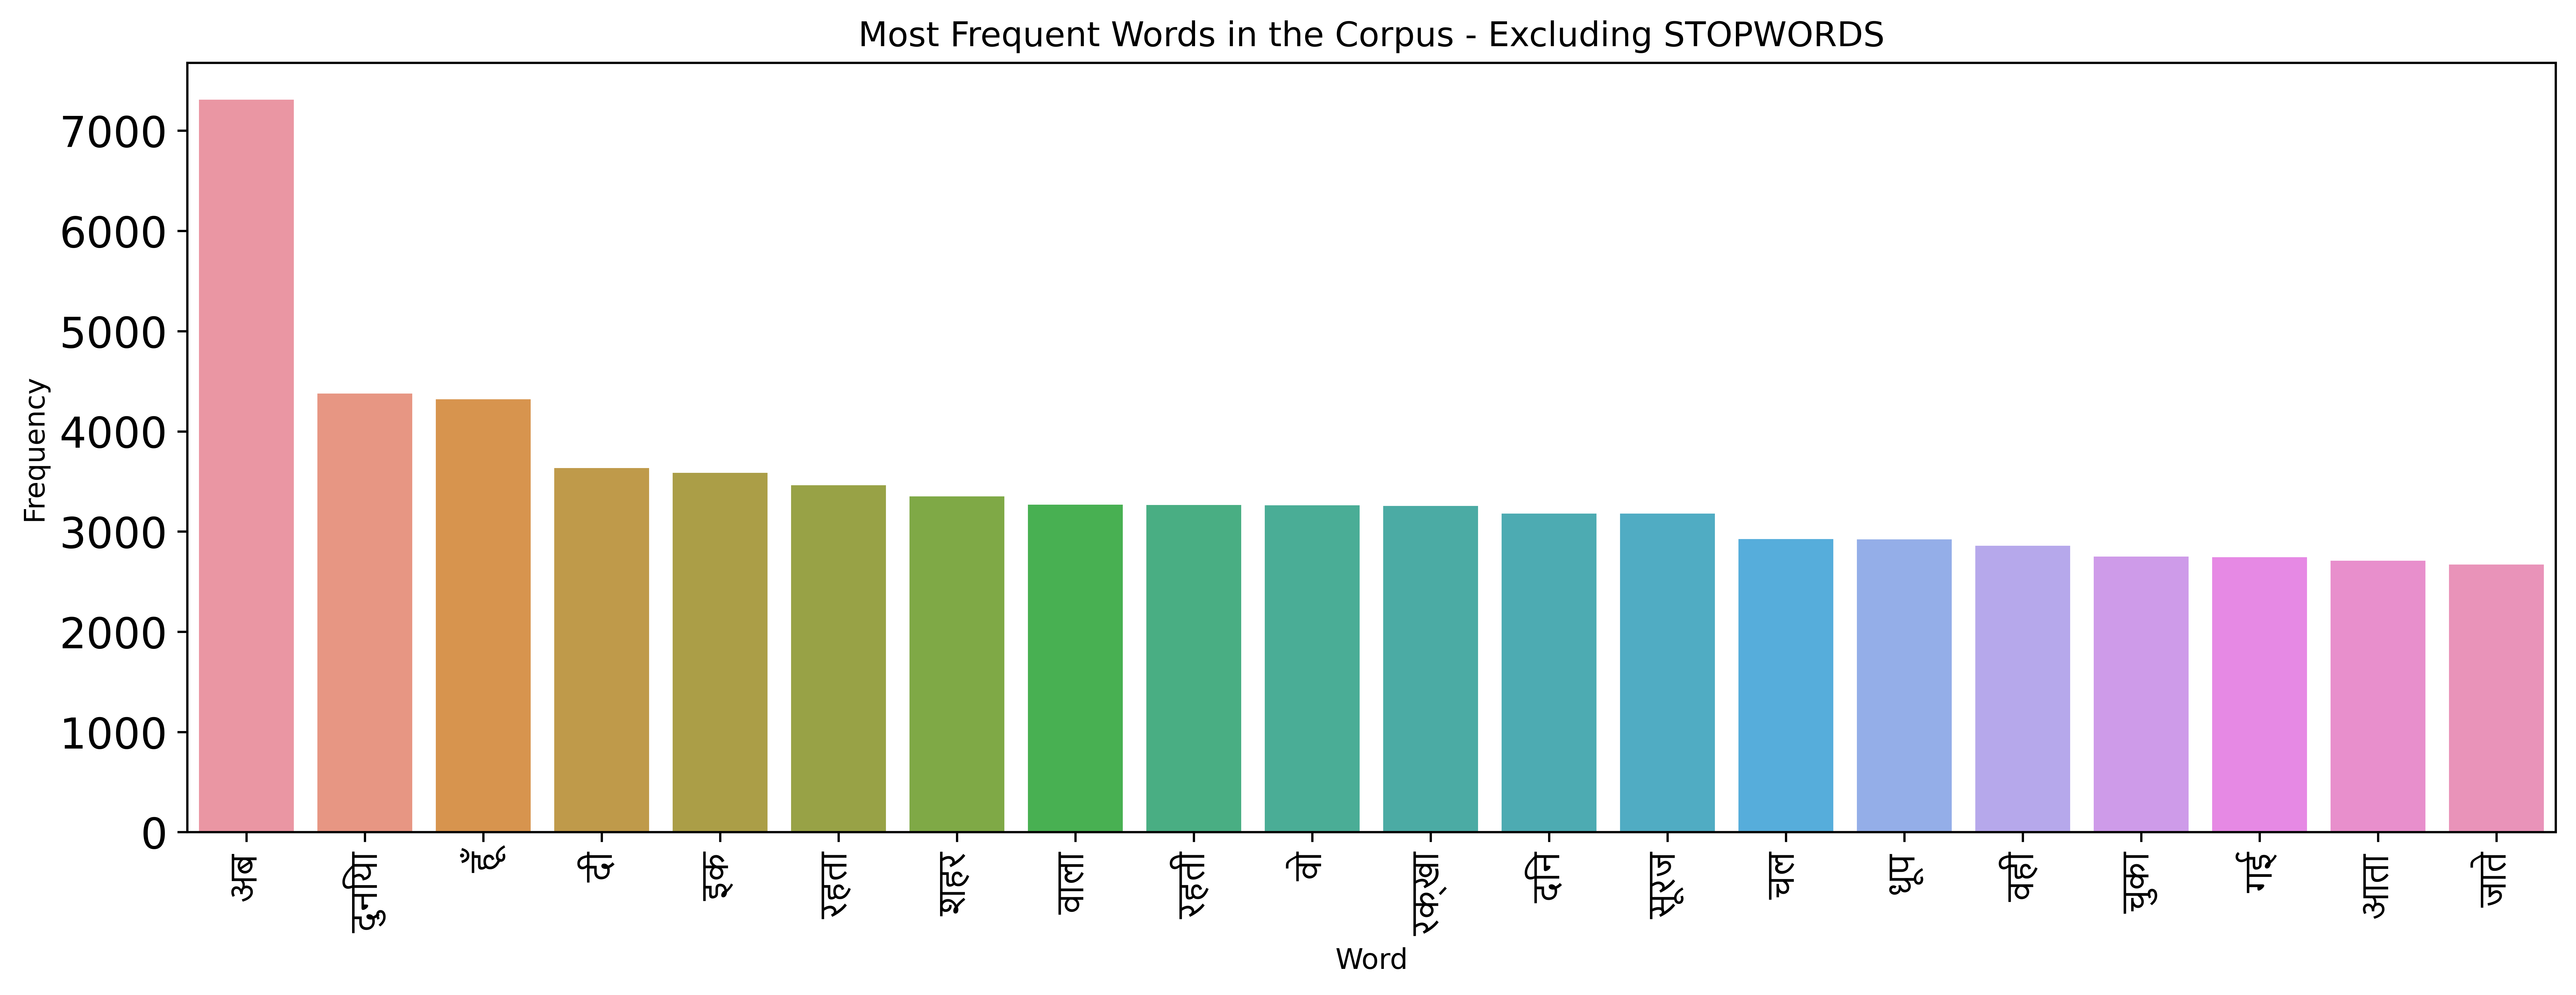

In [15]:
corpus = wordsWOstopwords

title = "Most Frequent Words in the Corpus - Excluding STOPWORDS"
# plot_word_frequency(corpus, title, 20)
word_freq = FreqDist(corpus)
labels = [element[0] for element in word_freq.most_common(20)]
counts = [element[1] for element in word_freq.most_common(20)]
plt.figure(figsize=(15,5), dpi=640)
plt.xticks(color="black", fontproperties=hindi_font, rotation=90, fontsize = 12)
plt.yticks(fontsize = 15)
plt.title(title)
plt.ylabel("Frequency")
plt.xlabel("Word")
plot = sns.barplot(labels,counts)

In [16]:
print(len(tokens), len(wordsWOstopwords))

1334457 806040


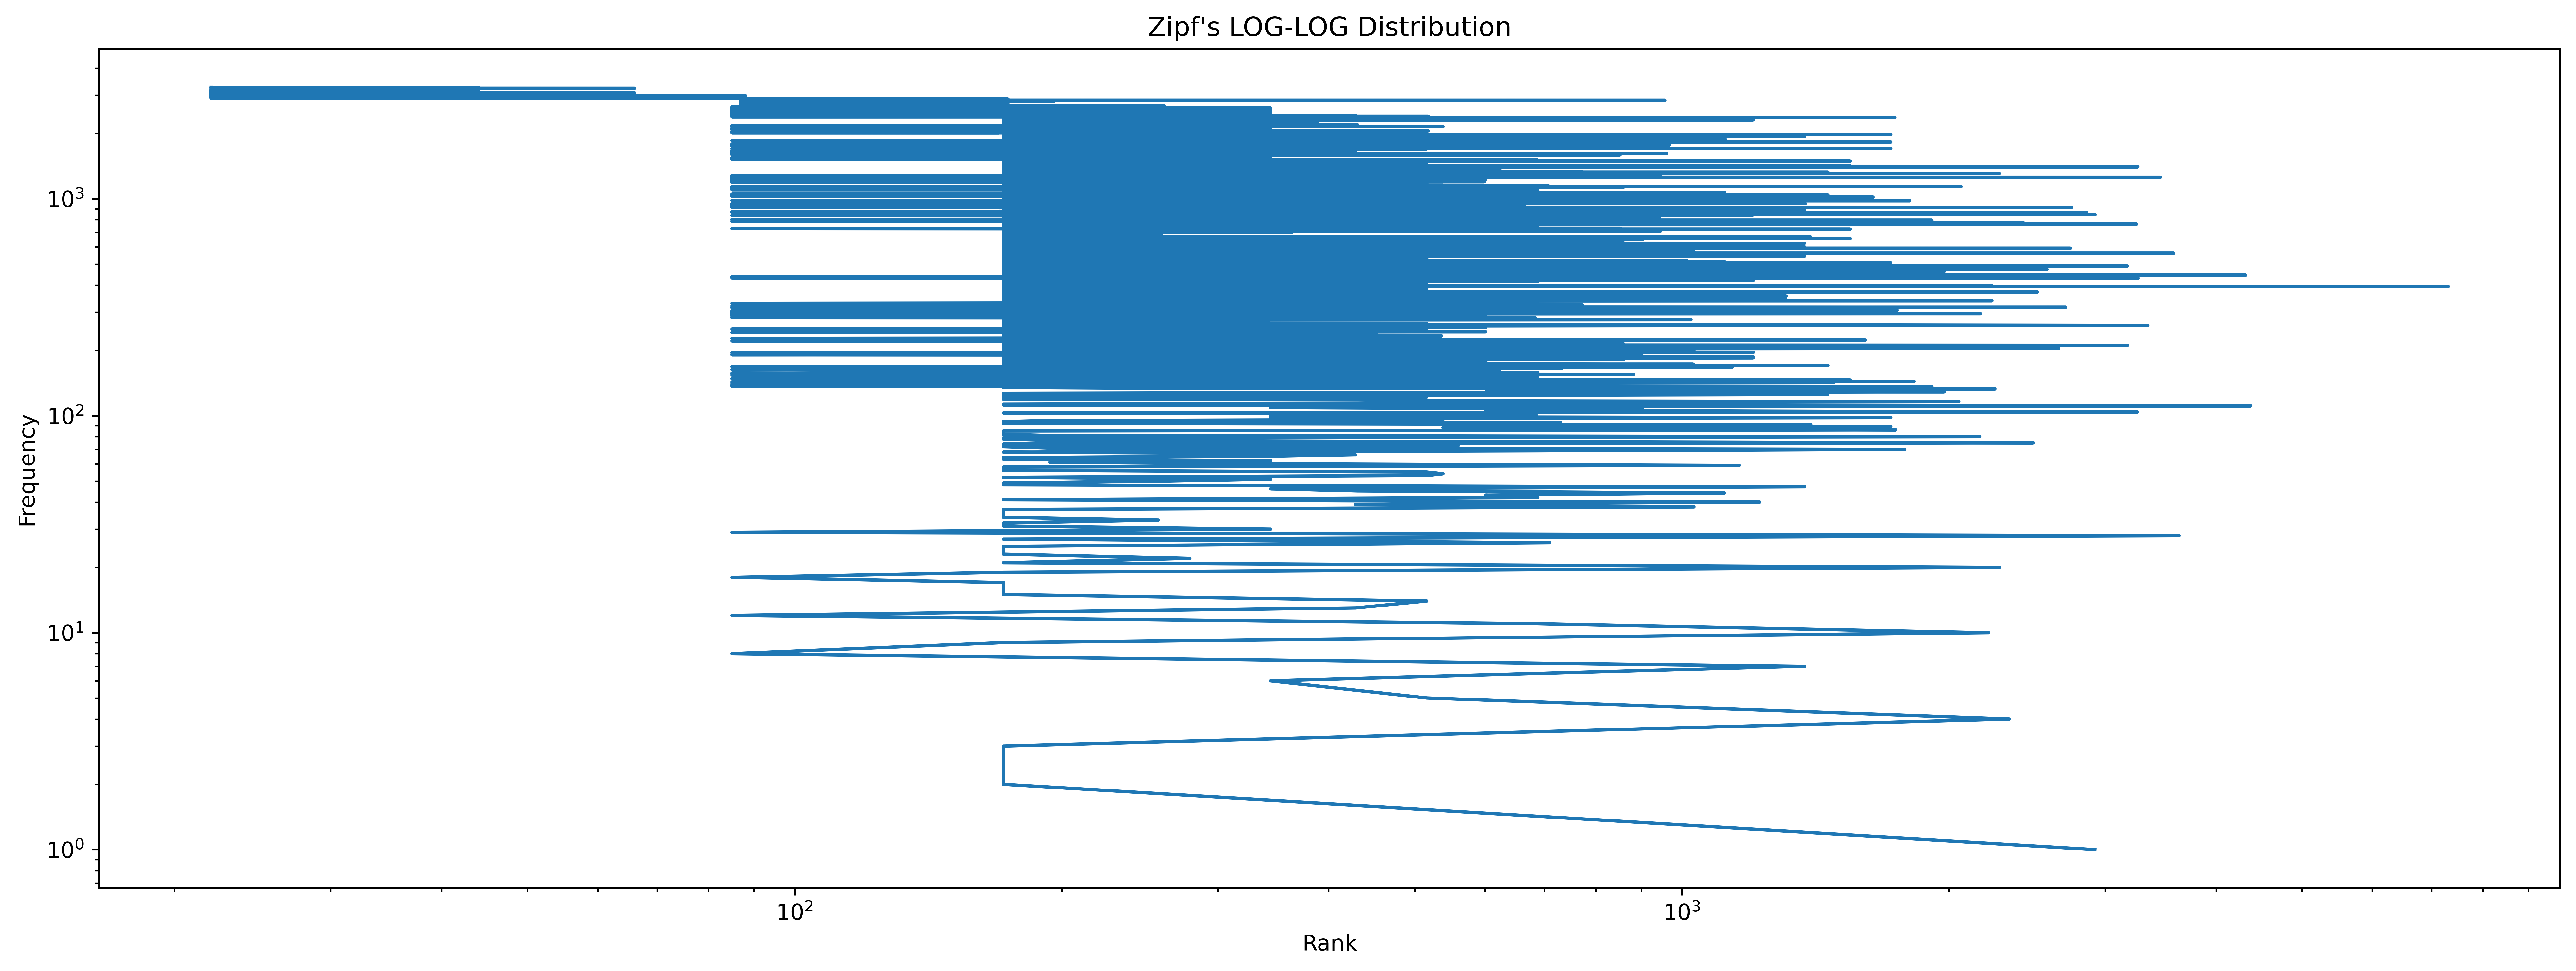

In [17]:
fd=FreqDist()
    
#Creating ranks and frequencies
ranks = []
freqs = []
for i in corpus:
    fd[i] +=1
for rank,word in enumerate(fd):
    ranks.append(rank+1)
    freqs.append(fd[word])
        
#Plotting the LOG-LOG distribution
plt.figure(figsize=(20,7), dpi=640)
plt.loglog(freqs,ranks)
plt.xlabel('Rank')
plt.ylabel('Frequency')
plt.title("Zipf's LOG-LOG Distribution")
plt.show()

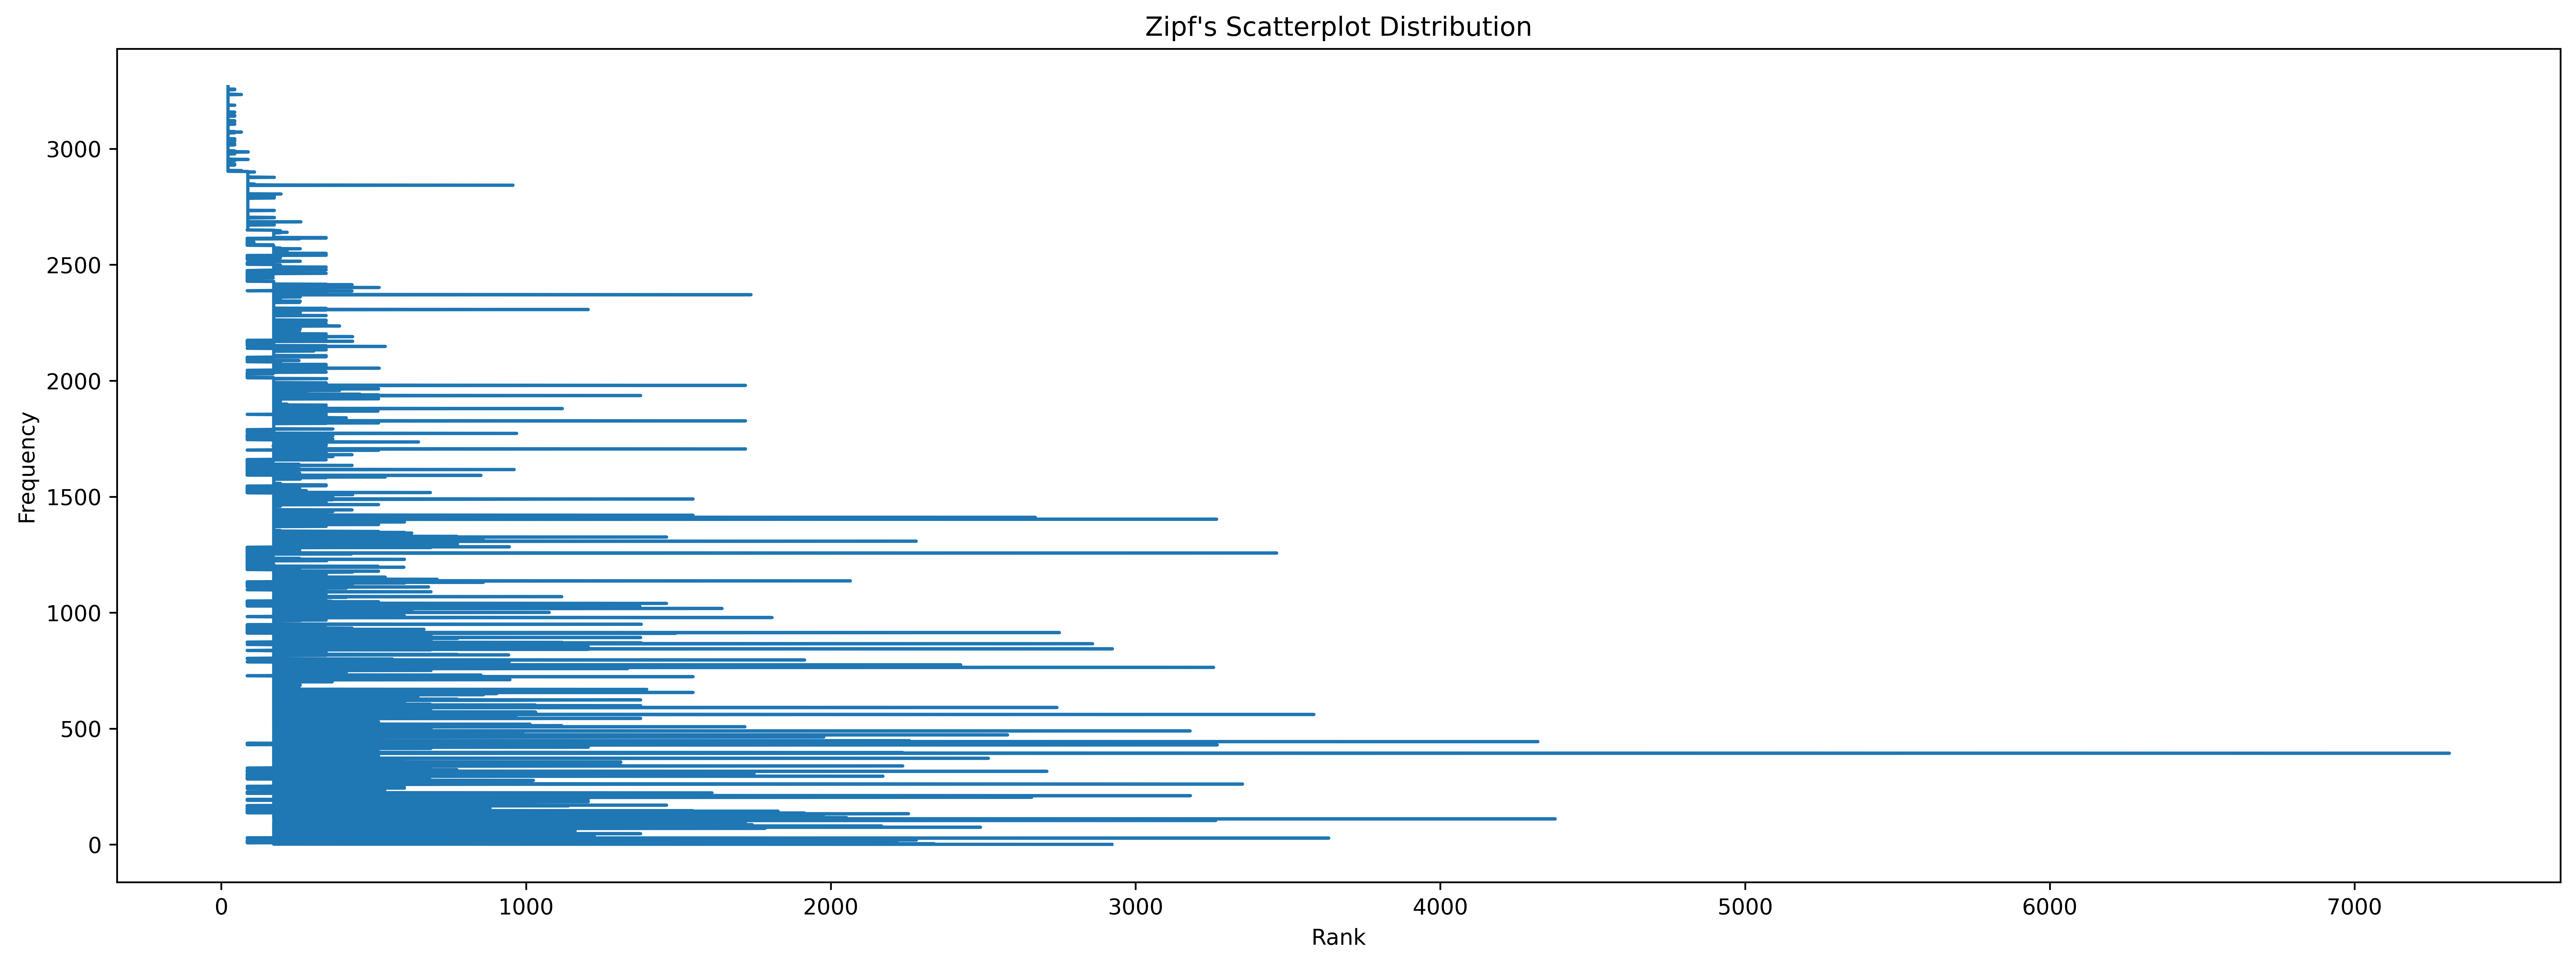

In [18]:
#Plotting the Scatterplot distribution
plt.figure(figsize=(20,7), dpi=640)
plt.plot(freqs,ranks)
plt.xlabel('Rank')
plt.ylabel('Frequency')
plt.title("Zipf's Scatterplot Distribution")
plt.show()

Heaps Law


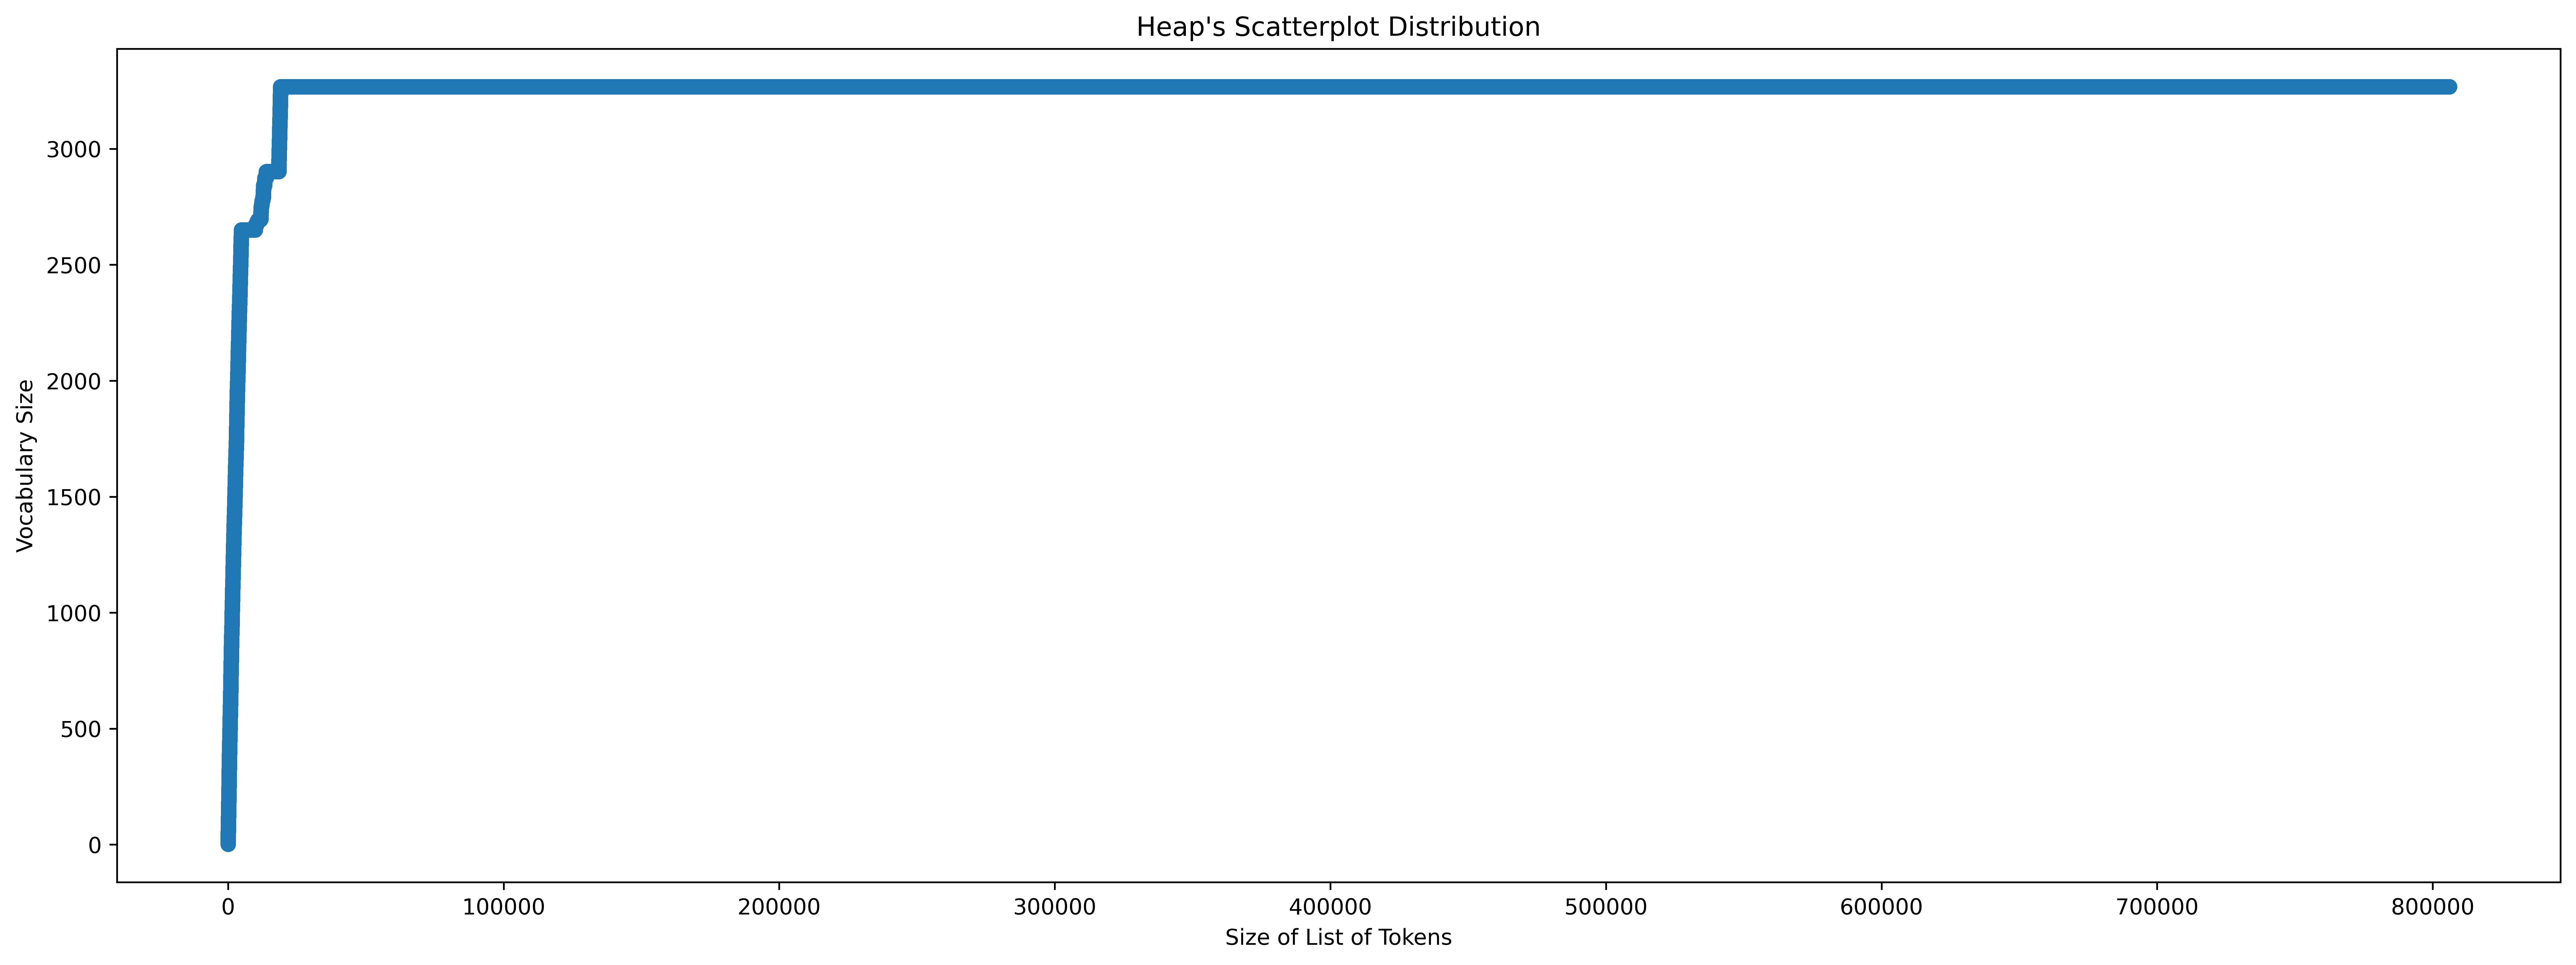

In [19]:
'''Heaps Law'''
    
print("Heaps Law")
    
uniq = set()
    
Tn = []
V = []
    
for i, token in enumerate(corpus):
    uniq.add(token)
    Tn.append(i)   #Tn: Tokens
    V.append(len(uniq))   #Vocab
    #print(i, len(uniq))
        
#Plotting the Scatterplot distribution for Heap's Law
plt.figure(figsize=(20,7), dpi=640)
plt.scatter(Tn,V)
plt.xlabel('Size of List of Tokens')
plt.ylabel('Vocabulary Size')
plt.title("Heap's Scatterplot Distribution")
plt.show()